# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress  

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(mouse_data_complete["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Timepoint", "Mouse ID"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_data["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).mean()
median = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).median()
var = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).var()
std = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).std()
sem = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance of Tumor Volume": var,
                           "Std. Dev of Tumor Volume": std, "Std. Error of Tumor Volume": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std. Dev of Tumor Volume,Std. Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

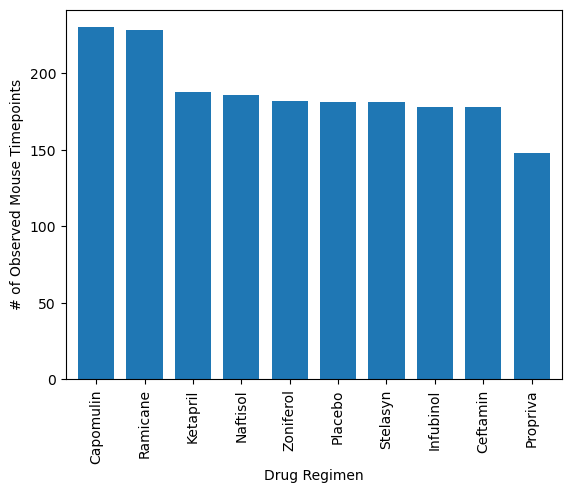

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_mouse_data["Drug Regimen"].value_counts()
count.plot.bar(align="center", width = 0.75)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

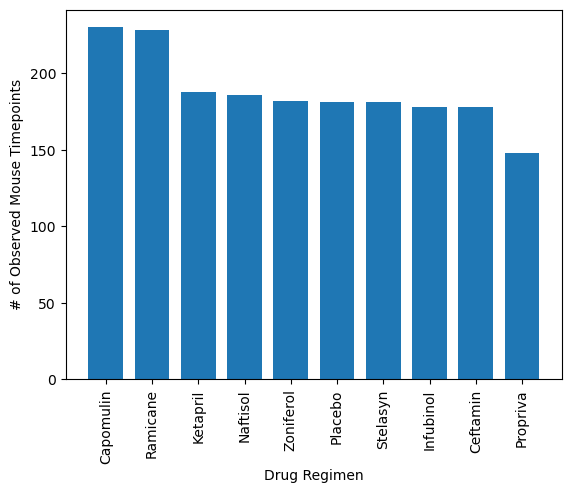

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count.index.values
y_axis = count.values
plt.bar(x_axis, y_axis, align="center", width = 0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

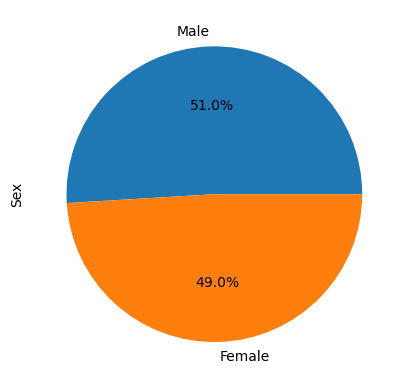

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_mouse_data["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

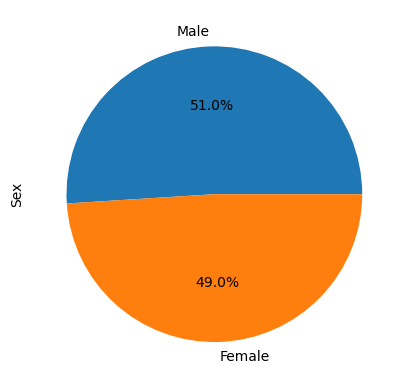

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
size = [51, 49]
plt.pie(size, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = clean_mouse_data[clean_mouse_data["Drug Regimen"].isin(drugs)]


# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = drugs_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(timepoint_df, clean_mouse_data, on=("Mouse ID", "Timepoint"), how="left")
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [144]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
vol = []
for drug in drugs:
    data = merged_df[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    vol.append(data)
    



# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for idx, data in enumerate(vol):
    
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"Potential outliers for {drugs[idx]}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


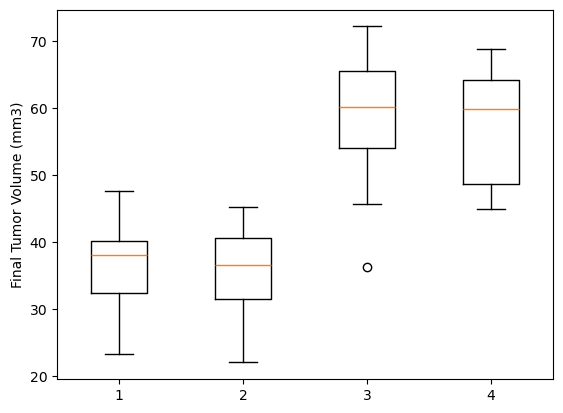

In [158]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(vol)
plt.show()

## Line and Scatter Plots

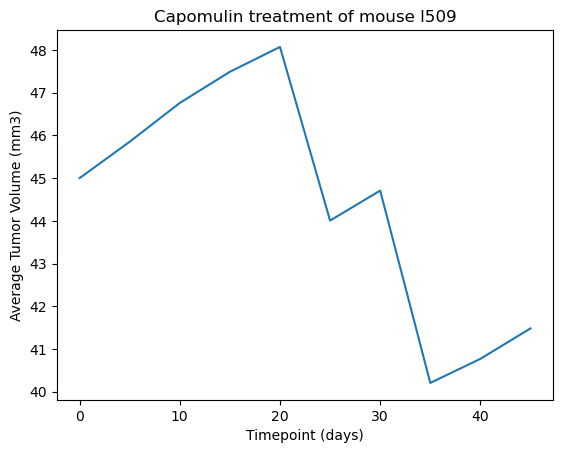

In [159]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509", :]
x_axis = Capomulin_df["Timepoint"]
y_axis = Capomulin_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()


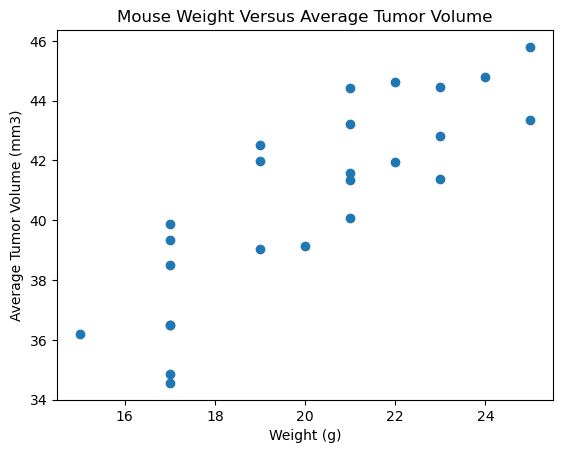

In [160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
avg_cap_vol = Cap_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = Cap_df.groupby(["Mouse ID"])["Weight (g)"].mean()
plt.scatter(weight, avg_cap_vol)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


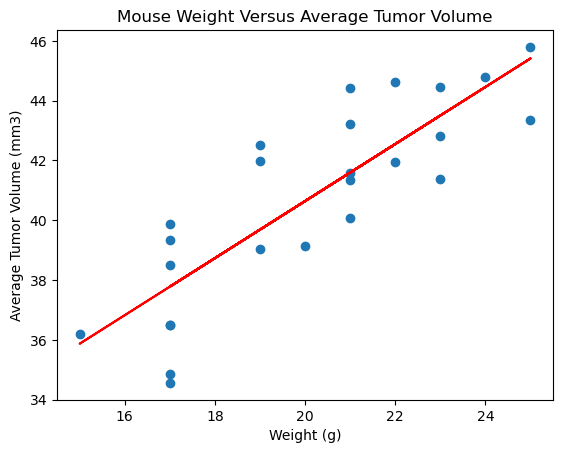

In [161]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_cap_vol, weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_cap_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_cap_vol)
plt.plot(weight, regress_values, "r-")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()